# Question 12
In this exercise, we will use simulations to empirically understand some findings.

In [ ]:
# import statements
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

## Part A
The goal here is to construct an approximation for the CDF of $X^+ = max\{0, X\}$ where $X \sim \mathcal{N}(-1,1)$. We will simulate an n-sized sample $x_1, x_2, ..., x_n$, particularly with $n = 20$ from the aforementioned distribution.

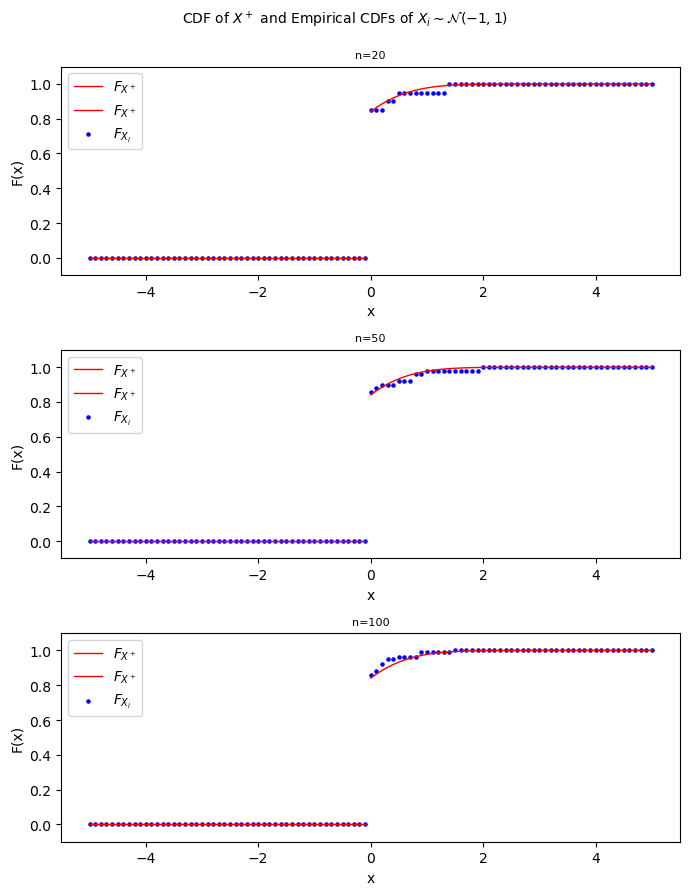

In [155]:
# plotting setup
fig, axes = plt.subplots(3, 1, figsize = (7,9))
fig.suptitle(r'CDF of $X^+$ and Empirical CDFs of $X_i \sim \mathcal{N}(-1,1)$', fontsize=10, y=0.99)

# create CDF approximation function of X+ = max{0,X}
def cdfApprox_xPlus(samples, x):
    return (1/(len(samples))) * sum([1 if max(s,0) <= x else 0 for s in samples])

# sample sizes to consider
n = [20, 50, 100]

# loop over different sample sizes
for i in range(3):
    # generate 20 samples from N(-1,1) using numpy random normal function
    samples = np.random.normal(-1,1,n[i])
    x = np.linspace(-5,5,101)

    # generate and plot CDF of X+ = max{0,X}
    pNeg = [0 for x in x if x < 0]
    pPos = [sp.stats.norm.cdf(0,-1,1)] + [sp.stats.norm.cdf(x,-1,1) for x in x if x > 0]
    axes[i].plot([xi for xi in x if xi < 0],pNeg, color='red', label=r'$F_{X^+}$', linewidth=1)
    axes[i].plot([xi for xi in x if xi >= 0],pPos, color='red', label=r'$F_{X^+}$', linewidth=1)

    # plot CDF
    axes[i].scatter(x, [cdfApprox_xPlus(samples, xi) for xi in x], color='b', label=r'${F}_{X_i}$', s=5)

    # add legend and show plot
    axes[i].legend()
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('F(x)')
    axes[i].set_title(f'n={n[i]}', fontsize=8)

plt.tight_layout()
plt.show()


### Commentary
As expected, the derived CDF for $X^+$ is 0 for any $x < 0$, then jumps to $\approx 0.8$ for $x = 0$ and proceeds as a continuous function.

We can see that the empirical CDFs (CDFs generated with $n$ samples) are step functions, which makes sense since we are taking the average of $n$ indicator variables given some threshold $x$. As $x$ varies significantly, the average will likely change. However, there may be multiple $x$-values that have the same indicator average because the same subset of indicator variables are less than that set of $x$'s. In other words, the number of indicator variables that satisfy the condition does not change until the condition is adequately raised or lowered, so the step function is an intuitive result.

Further, the empirical CDF approximation becomes increasingly smooth as $n$ increases. It also converges to $F$ pointwise as $n$ increases, which illustrates the law of large numbers that we use to prove $F_n \rightarrow F$ as $n \rightarrow \infty$.

## Part B
Let $X \sim \mathcal{N}(0,1)$ and $Y = sin(X)$. We will use simulations to draw an approximation of $F_Y$, the CDF of $Y$. Consider the
mathematical derivation of this CDF.

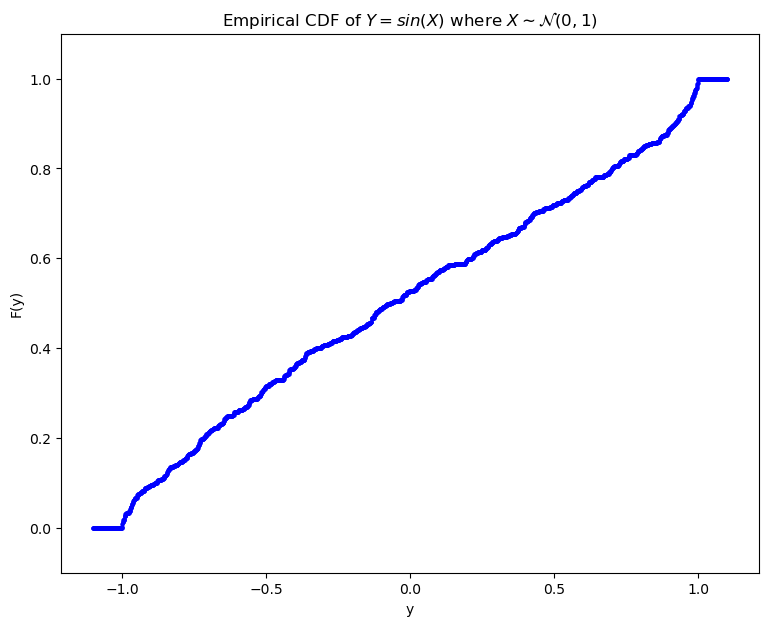

In [157]:
# plotting setup
plt.figure(figsize=(9,7))
plt.title(r'Empirical CDF of $Y = sin(X)$ where $X \sim \mathcal{N}(0,1)$')

# draw samples from N(0,1)
samples = np.random.normal(0,1,500)

# create CDF approximation function of Y = sin(X)
def cdfApprox_sinY(samples, x):
    return (1/(len(samples))) * sum([1 if math.sin(s) <= x else 0 for s in samples])

# plot CDF
x = np.linspace(-1.1, 1.1, 2000)
plt.scatter(x, [cdfApprox_sinY(samples, xi) for xi in x], color='b', label=r'${F}_{Y}$', s=5)
plt.ylim(-0.1, 1.1)
plt.xlabel('y')
plt.ylabel('F(y)')
plt.show()
